In [27]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import LSTM
from keras.layers import Dense, Conv2D,Flatten, Dropout, TimeDistributed, RepeatVector
from keras.optimizers import Adam
from keras.layers import TimeDistributed
import keras
import matplotlib.pyplot as plt
import utm
from sklearn.preprocessing import minmax_scale, MinMaxScaler
from keras import backend as K
import math

def distance_loss(y_pred, y_true):
    return K.sqrt(K.mean(K.sum(K.square(y_pred-y_true), axis=-1)))

def Dist_Error(pred,real):
    errors=np.abs(pred-real)
    result=[math.sqrt(math.pow(i[0],2)+math.pow(i[1],2))for i in errors]
    return np.array(result)

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch': [], 'epoch': []}
        self.accuracy = {'batch': [], 'epoch': []}
        self.val_loss = {'batch': [], 'epoch': []}
        self.val_acc = {'batch': [], 'epoch': []}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()


data = pd.read_csv('trainfix.csv')
X_temp = [
    np.concatenate([mr[4:9],mr[9:14],mr[14:19],mr[19:24],mr[24:29],
               mr[29:34]]) for mr in data.values
]
X_temp = np.array(X_temp)
y_temp = []
zone_number = 0
zone_letter = 0
for mr in data.values:
    lat, lon, zone_number, zone_letter = utm.from_latlon(mr[-4], mr[-5])
    y_temp.append([lat, lon])
y_temp = np.array(y_temp)
scaler = MinMaxScaler()
y_temp = scaler.fit_transform(y_temp)
print(data['IMSI'].unique())
print(data[data['IMSI']==460091042103139]['TrajID'].unique().tolist())

[4.60012797e+14 4.60016292e+14 4.60011671e+14 4.60091042e+14]
[30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0]


In [28]:
traj = [30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0]
X = []
y = []
for t in range(len(traj)):
    temp = X_temp[(data['IMSI'] == 460091042103139) & (data['TrajID'] == traj[t])]
    temp_y = y_temp[(data['IMSI'] == 460091042103139) & (data['TrajID'] == traj[t])]
    for i in range(len(temp)-5):
        X.append(temp[i:i+6])
        y.append(temp_y[i:i+6])
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y[0])

(3281, 6, 30)
[[0.49515133 0.40409983]
 [0.49515133 0.40409983]
 [0.50255955 0.41648126]
 [0.50298979 0.41723443]
 [0.5057066  0.42329418]
 [0.5057066  0.42329418]]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 6, 150)            108600    
_________________________________________________________________
lstm_10 (LSTM)               (None, 6, 150)            180600    
_________________________________________________________________
time_distributed_17 (TimeDis (None, 6, 1024)           154624    
_________________________________________________________________
time_distributed_18 (TimeDis (None, 6, 512)            524800    
_________________________________________________________________
time_distributed_19 (TimeDis (None, 6, 512)            262656    
_________________________________________________________________
time_distributed_20 (TimeDis (None, 6, 2)              1026      
Total params: 1,232,306
Trainable params: 1,232,306
Non-trainable params: 0
_________________________________________________________________


3281/3281 [==============================] - 2s 473us/step - loss: 0.0392 - mean_squared_error: 8.2143e-04
Epoch 130/800
3281/3281 [==============================] - 2s 464us/step - loss: 0.0447 - mean_squared_error: 0.0011
Epoch 131/800
3281/3281 [==============================] - 2s 474us/step - loss: 0.0164 - mean_squared_error: 1.4106e-04
Epoch 132/800
3281/3281 [==============================] - 2s 474us/step - loss: 0.0115 - mean_squared_error: 6.6408e-05
Epoch 133/800
3281/3281 [==============================] - 2s 471us/step - loss: 0.0107 - mean_squared_error: 5.7925e-05
Epoch 134/800
3281/3281 [==============================] - 2s 482us/step - loss: 0.0108 - mean_squared_error: 5.8984e-05
Epoch 135/800
3281/3281 [==============================] - 2s 463us/step - loss: 0.0099 - mean_squared_error: 4.9510e-05
Epoch 136/800
3281/3281 [==============================] - 2s 485us/step - loss: 0.0095 - mean_squared_error: 4.5072e-05
Epoch 137/800
3281/3281 [=========================

3281/3281 [==============================] - 2s 480us/step - loss: 0.0104 - mean_squared_error: 6.0402e-05
Epoch 264/800
3281/3281 [==============================] - 2s 478us/step - loss: 0.0312 - mean_squared_error: 5.2750e-04
Epoch 265/800
3281/3281 [==============================] - 2s 471us/step - loss: 0.0375 - mean_squared_error: 7.6300e-04
Epoch 266/800
3281/3281 [==============================] - 2s 462us/step - loss: 0.0181 - mean_squared_error: 1.7098e-04
Epoch 267/800
3281/3281 [==============================] - 2s 477us/step - loss: 0.0148 - mean_squared_error: 1.1631e-04
Epoch 268/800
3281/3281 [==============================] - 2s 464us/step - loss: 0.0092 - mean_squared_error: 4.2512e-05
Epoch 269/800
3281/3281 [==============================] - 2s 458us/step - loss: 0.0319 - mean_squared_error: 8.1960e-04
Epoch 270/800
3281/3281 [==============================] - 1s 442us/step - loss: 0.0237 - mean_squared_error: 3.0961e-04
Epoch 271/800
3281/3281 [=====================

3281/3281 [==============================] - 2s 462us/step - loss: 0.0049 - mean_squared_error: 1.2241e-05
Epoch 398/800
3281/3281 [==============================] - 2s 467us/step - loss: 0.0046 - mean_squared_error: 1.1015e-05
Epoch 399/800
3281/3281 [==============================] - 2s 474us/step - loss: 0.0049 - mean_squared_error: 1.2402e-05
Epoch 400/800
3281/3281 [==============================] - 2s 471us/step - loss: 0.0046 - mean_squared_error: 1.0991e-05
Epoch 401/800
3281/3281 [==============================] - 2s 468us/step - loss: 0.0047 - mean_squared_error: 1.0998e-05
Epoch 402/800
3281/3281 [==============================] - 2s 471us/step - loss: 0.0047 - mean_squared_error: 1.1328e-05
Epoch 403/800
3281/3281 [==============================] - 2s 473us/step - loss: 0.0046 - mean_squared_error: 1.0856e-05
Epoch 404/800
3281/3281 [==============================] - 2s 486us/step - loss: 0.0047 - mean_squared_error: 1.1157e-05
Epoch 405/800
3281/3281 [=====================

3281/3281 [==============================] - 2s 471us/step - loss: 0.0054 - mean_squared_error: 1.5150e-05
Epoch 532/800
3281/3281 [==============================] - 2s 479us/step - loss: 0.0052 - mean_squared_error: 1.3782e-05
Epoch 533/800
3281/3281 [==============================] - 2s 496us/step - loss: 0.0063 - mean_squared_error: 2.1841e-05
Epoch 534/800
3281/3281 [==============================] - 2s 471us/step - loss: 0.0092 - mean_squared_error: 4.2918e-05
Epoch 535/800
3281/3281 [==============================] - 2s 471us/step - loss: 0.0081 - mean_squared_error: 3.4093e-05
Epoch 536/800
3281/3281 [==============================] - 2s 483us/step - loss: 0.0069 - mean_squared_error: 2.5724e-05
Epoch 537/800
3281/3281 [==============================] - 2s 501us/step - loss: 0.0158 - mean_squared_error: 1.4616e-04
Epoch 538/800
3281/3281 [==============================] - 2s 473us/step - loss: 0.0251 - mean_squared_error: 3.6615e-04
Epoch 539/800
3281/3281 [=====================

3281/3281 [==============================] - 1s 450us/step - loss: 0.0085 - mean_squared_error: 4.0430e-05
Epoch 666/800
3281/3281 [==============================] - 1s 433us/step - loss: 0.0101 - mean_squared_error: 5.4547e-05
Epoch 667/800
3281/3281 [==============================] - 1s 440us/step - loss: 0.0075 - mean_squared_error: 3.1236e-05
Epoch 668/800
3281/3281 [==============================] - 1s 453us/step - loss: 0.0050 - mean_squared_error: 1.2710e-05
Epoch 669/800
3281/3281 [==============================] - 2s 489us/step - loss: 0.0044 - mean_squared_error: 9.7234e-06
Epoch 670/800
3281/3281 [==============================] - 2s 465us/step - loss: 0.0041 - mean_squared_error: 8.7109e-06
Epoch 671/800
3281/3281 [==============================] - 1s 453us/step - loss: 0.0040 - mean_squared_error: 8.0879e-06
Epoch 672/800
3281/3281 [==============================] - 1s 435us/step - loss: 0.0039 - mean_squared_error: 7.7789e-06
Epoch 673/800
3281/3281 [=====================

3281/3281 [==============================] - 2s 484us/step - loss: 0.0030 - mean_squared_error: 4.6149e-06
Epoch 800/800
3281/3281 [==============================] - 2s 470us/step - loss: 0.0036 - mean_squared_error: 6.7899e-06


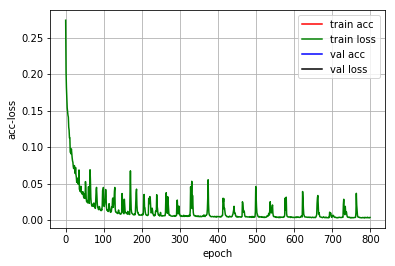

In [32]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

history = LossHistory()

def build_model():
    m=Sequential()
    m.add(LSTM(150,return_sequences=True,input_shape=(6,30)))
    m.add(LSTM(150,return_sequences=True))
    m.add(TimeDistributed(Dense(1024, activation='relu')))
    m.add(TimeDistributed(Dense(512, activation='relu')))
    m.add(TimeDistributed(Dense(512, activation='relu')))
    m.add(TimeDistributed(Dense(2, activation='linear')))
    r = Adam(lr=0.001)
    m.compile(optimizer=r,loss=distance_loss,metrics=['mse'])
    return m

model=build_model()
model.summary()
model.fit(X, y, epochs=800, batch_size=64, callbacks=[history])
# model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=800, batch_size=64, callbacks=[history])
history.loss_plot('epoch')

In [30]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1,2)
y_pred = scaler.inverse_transform(y_pred)
y_test = y_test.reshape(-1,2)
y_real=scaler.inverse_transform(y_test)
errors=Dist_Error(y_pred,y_real)
errors=np.array(errors)
print(np.median(errors))
print(np.mean(errors))
print(np.sort(errors)[int(len(errors)*0.9)])

4.591861951287191
9.01460344532173
16.067524848618344


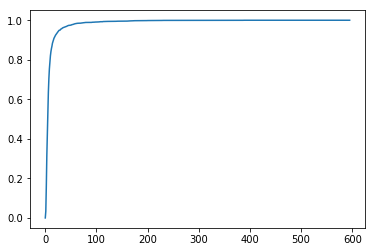

In [31]:
x = np.arange(0,np.max(errors))
error_y = [len(errors[errors < i])/len(errors) for i in x]
plt.plot(x, error_y)

In [33]:
data_test = pd.read_csv('testfix.csv')
print(data_test[data_test['IMSI']==460091042103139]['TrajID'].unique().tolist())

[28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0]


In [35]:
data_test = pd.read_csv('testfix.csv')
traj = [28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0]
X_test = [
    np.concatenate([mr[4:9],mr[9:14],mr[14:19],mr[19:24],mr[24:29],
               mr[29:34]]) for mr in data_test.values
]
X_test = np.array(X_test)
X_final = []
traj_id=[]
TrajID=data_test[data_test['IMSI'] == 460091042103139]['TrajID'].values
print(TrajID.shape)
for t in range(len(traj)):
    temp = X_test[(data_test['IMSI'] == 460091042103139) & (data_test['TrajID'] == traj[t])]
    for i in range(len(temp)-5):
        X_final.append(temp[i:i+6])
        traj_id.append(traj[t])
X_final = np.array(X_final)
y_pred = model.predict(X_final)
print(y_pred.shape)

(856,)
(646, 6, 2)


In [36]:
import math
# 将重复轨迹合并
def traj_merge(traj_id,trajs,code=0):
    maxleng=len(trajs[0])
    last=-1
    result=[]
    for i in range(len(traj_id)):
        if traj_id[i]!=last:
            result+=trajs[i]
            last=traj_id[i]
        else:
            result.append(trajs[i][maxleng-1])
    return result

In [37]:
y_p = traj_merge(traj_id,y_pred.tolist())
print(len(y_p))

856


In [38]:
y_pr = scaler.inverse_transform(y_p)
y_final = [[utm.to_latlon(i[0], i[1], zone_number=zone_number, zone_letter=zone_letter)[1],
            utm.to_latlon(i[0], i[1], zone_number=zone_number, zone_letter=zone_letter)[0]] for i in y_pr]

In [39]:
y_final = np.array(y_final)

In [40]:
print(TrajID.shape)
print(y_final.shape)

(856,)
(856, 2)


In [41]:
df_pred = pd.DataFrame(data={'TrajID':TrajID,'Longitude':y_final[:,0], 'Latitude':y_final[:,1]})
df_pred.to_csv('pred3_460091042103139.csv', index=False)
print('success')

success
